In [522]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st


In [523]:
mouse = pd.read_csv('data/Mouse_metadata.csv')
study = pd.read_csv('data/Study_results.csv')



In [524]:
#merged CSVs
pyma_df = pd.merge(mouse,study,on = 'Mouse ID', how = 'left')

pyma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [525]:
#counted # of mice 
pyma_df['Mouse ID'].count()



1893

In [526]:
# found duplicates based on mouse id and timepoint
pyma_dup = pyma_df[pyma_df.duplicated(subset = ['Mouse ID', 'Timepoint'],
                              keep = False)]

pyma_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [527]:
#drop duplicates
pyma_cleandf = pyma_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
#check to see if duplicates were dropped
pyma_cleandf[908:917]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2
921,h246,Ketapril,Male,13,30,0,45.000000,0


In [528]:
# mouse count is changed by 5 entries
pyma_cleandf['Mouse ID'].count()

1888

In [529]:
#generate summary statistics of tumor volume by regimen
pyma_groupreg = pyma_cleandf.groupby(['Drug Regimen'])
#mean
meandrug = pyma_groupreg['Tumor Volume (mm3)'].mean()
#median
mediandrug = pyma_groupreg['Tumor Volume (mm3)'].median()
#variance
vardrug = pyma_groupreg['Tumor Volume (mm3)'].var()
#standard deviation
stddrug = pyma_groupreg['Tumor Volume (mm3)'].std()
#standard error of the mean
semdrug = pyma_groupreg['Tumor Volume (mm3)'].sem()

#combine into stats into summary 
drug_statssumm = pd.DataFrame({'Mean': meandrug,
                              'Median' : mediandrug,
                              'Variance': vardrug,
                              'Standard Deviation' : stddrug,
                              'SEM' : semdrug})

drug_statssumm

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [530]:
#using aggregation method - summary stats using single line of code
pyma_groupreg['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


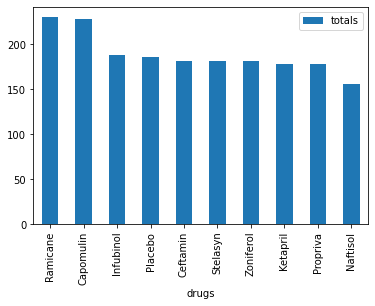

In [531]:
drugnames = pyma_cleandf['Drug Regimen'].unique()
drugtotals = pyma_cleandf['Drug Regimen'].value_counts()

# bar graph showing total measurements by drug regiment
df = pd.DataFrame({'drugs': drugnames, 
                  'totals': drugtotals})
drugmeasures = df.plot.bar(x='drugs', y = 'totals')



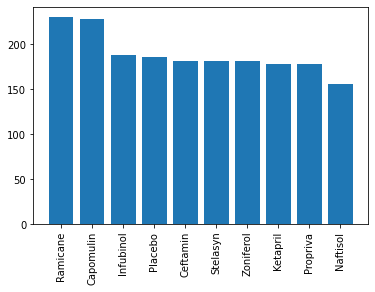

In [532]:
#using pyplot to show previous bargraph
plt.bar(drugnames,drugtotals)

#manipulate bar labels to show full-name
labels = [x for x in drugnames]

plt.xticks(labels, drugnames,rotation=90)

plt.show()

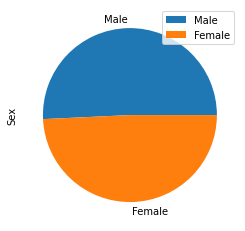

In [533]:
#creating series to plot
mousesex=pyma_cleandf['Sex'].value_counts()


dfms=pd.DataFrame(mousesex)

dfms.plot.pie(y=0)



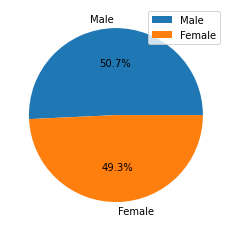

In [534]:
#pie chart using pyplot
sexes = pyma_cleandf['Sex'].unique()

#easily added percentages
plt.pie(mousesex,labels = sexes, autopct = '%1.1f%%')
#include legend
plt.legend(loc = 'best')

plt.show()

In [535]:
#new dataframe with only selected drug types in regiment

pyma_bydrug = pyma_cleandf.loc[((pyma_cleandf['Drug Regimen'] =='Ramicane') | (pyma_cleandf['Drug Regimen'] =='Infubinol') | (pyma_cleandf['Drug Regimen'] =='Ceftamin') | (pyma_cleandf['Drug Regimen'] =='Capomulin'))]



In [627]:
#create dataframe that shows the last occurence of a Mouse's ID corresponding with it's final Timepoint

max_timepoint = pyma_bydrug.groupby('Mouse ID')['Timepoint']

max_time = pd.DataFrame(max_timepoint.max())

mouse_endpoint = pd.merge(max_time,pyma_bydrug, how = 'outer', on = 'Mouse ID')

mouse_endpoint

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
809,z581,45,Infubinol,Female,24,25,25,54.316407,2
810,z581,45,Infubinol,Female,24,25,30,56.286750,2
811,z581,45,Infubinol,Female,24,25,35,58.628399,3
812,z581,45,Infubinol,Female,24,25,40,60.053740,3


In [653]:
treatments = pyma_bydrug['Drug Regimen'].unique()

tumorvols = []


for e in treatments: 
    final_time=mouse_endpoint.loc[(mouse_endpoint['Timepoint_x']==mouse_endpoint['Timepoint_y'])]
    tumorvols.append(final_time['Tumor Volume (mm3)'])
    
  
    #grouped the dataframe with end timepoints/tumor volume by drug regimen 

final_timepgroup = final_time.groupby(['Drug Regimen'])
    #created quartiles for each drug group using tumor volume data 

quartiles = final_timepgroup['Tumor Volume (mm3)'].quantile([0.25,0.5,.75])



[9      67.973419
 19     65.525743
 29     62.999356
 39     38.407618
 49     43.047543
          ...    
 773    68.594745
 783    31.896238
 793    64.729837
 803    30.638696
 813    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 9      67.973419
 19     65.525743
 29     62.999356
 39     38.407618
 49     43.047543
          ...    
 773    68.594745
 783    31.896238
 793    64.729837
 803    30.638696
 813    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 9      67.973419
 19     65.525743
 29     62.999356
 39     38.407618
 49     43.047543
          ...    
 773    68.594745
 783    31.896238
 793    64.729837
 803    30.638696
 813    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 9      67.973419
 19     65.525743
 29     62.999356
 39     38.407618
 49     43.047543
          ...    
 773    68.594745
 783    31.896238
 793    64.729837
 803    30.638696
 813    62.754451
 Name: Tumor Volume (mm3), Length: 100, 

In [654]:
cap_lowq = quartiles['Capomulin', 0.25]
cap_highq = quartiles['Capomulin', 0.75]
cap_iqr = cap_highq - cap_lowq 

cap_lowb = cap_lowq - (1.5*cap_iqr)

cap_highb = cap_highq + (1.5*cap_iqr)

print(f'values below {cap_lowb} could be outliers in Capomulin group.')
print(f'values above {cap_highb} could be outliers in Capomulin group.')

values below 20.70456164999999 could be outliers in Capomulin group.
values above 51.83201549 could be outliers in Capomulin group.


In [655]:
ram_lowq = quartiles['Ramicane', 0.25]
ram_highq = quartiles['Ramicane', 0.75]
ram_iqr = ram_highq - ram_lowq 

ram_lowb = ram_lowq - (1.5*ram_iqr)

ram_highb = ram_highq + (1.5*ram_iqr)

print(f'values below {ram_lowb} could be outliers in Ramicane group.')
print(f'values above {ram_highb} could be outliers in Ramicane group.')

values below 17.912664470000003 could be outliers in Ramicane group.
values above 54.30681135 could be outliers in Ramicane group.


In [656]:
inf_lowq = quartiles['Infubinol', 0.25]
inf_highq = quartiles['Infubinol', 0.75]
inf_iqr = inf_highq - inf_lowq 

inf_lowb = inf_lowq - (1.5*inf_iqr)

inf_highb = inf_highq + (1.5*inf_iqr)

print(f'values below {inf_lowb} could be outliers in Infubinol group.')
print(f'values above {inf_highb} could be outliers in Infubinol group.')

values below 36.83290494999999 could be outliers in Infubinol group.
values above 82.74144559000001 could be outliers in Infubinol group.


In [657]:
cef_lowq = quartiles['Ceftamin', 0.25]
cef_highq = quartiles['Ceftamin', 0.75]
cef_iqr = cef_highq - inf_lowq 

cef_lowb = cef_lowq - (1.5*inf_iqr)

cef_highb = cef_highq + (1.5*inf_iqr)

print(f'values below {cef_lowb} could be outliers in Ceftamin group.')
print(f'values above {cef_highb} could be outliers in Ceftamin group.')

values below 31.506375109999993 could be outliers in Ceftamin group.
values above 81.51553277 could be outliers in Ceftamin group.


{'whiskers': [<matplotlib.lines.Line2D at 0x2312fcf1588>,
 'caps': [<matplotlib.lines.Line2D at 0x2312fd6fb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2312fcf1048>,
 'medians': [<matplotlib.lines.Line2D at 0x2312fdc08d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2312fdc0f28>,
 'means': []}

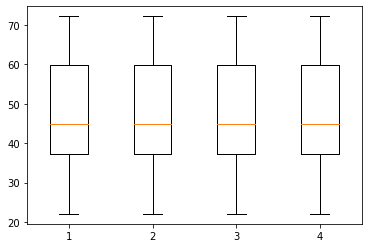

In [661]:
plt.boxplot(tumorvols)